In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# x'  = f(t,x)
def f(t,x):
    return x - t**2 + 1

# x'' = f'(t,x)
def df(t,x):
    return x - t**2 - 2*t + 1

def d2f(t,x):
    return x - t**2 - 2*t - 1

def d3f(t,x):
    return x - t**2 - 2*t - 1

# solução exata
def g(t):
    return -0.5*np.exp(t) + t**2 + 2*t + 1

def part(N, tmin, tmax):
    h = (tmax - tmin)/N
    
    t = np.zeros(N+1)
    for i in range(len(t)):
        t[i] = tmin + i*h
    
    return t

def metodo_de_taylor_ordem_2(N,y, tmin, tmax):
    h = (tmax - tmin)/N
    
    t = part(N, tmin, tmax)
    
    w = np.zeros(N+1)
    
    w[0] = y
    for i in range(1,len(w)):
        w[i] = w[i-1] + h*(f(t[i-1], w[i-1])) + 0.5*(h**2)*df(t[i-1], w[i-1])
        
    return w,t

def metodo_de_taylor_ordem_4(N,y, tmin, tmax):
    h = (tmax - tmin)/N
    
    t = part(N, tmin, tmax)
    
    w = np.zeros(N+1)
    
    w[0] = y
    for i in range(1,len(w)):
        w[i] = w[i-1] + h*(f(t[i-1], w[i-1])) + 0.5*(h**2)*df(t[i-1], w[i-1]) + (1/6)*(h**3)*d2f(t[i-1], w[i-1]) + (1/24)*(h**4)*d3f(t[i-1], w[i-1])
        
    return w,t

[0.         0.01186064 0.03882841 0.09533672 0.20807785]


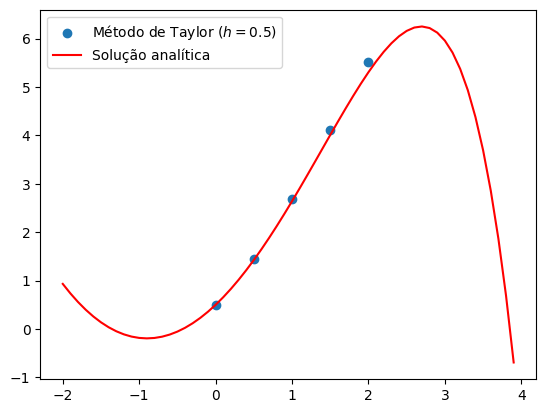

In [3]:
w, t = metodo_de_taylor_ordem_2(4, 0.5, 0, 2)

h = t[1] - t[0]

x = np.arange(-2,4,0.1)
y = g(x)

print(abs(g(t) - w))

plt.scatter(t,w, label=f'Método de Taylor ($h = {h}$)')
plt.plot(x,y, label='Solução analítica', c='r')
plt.legend()
plt.savefig('metodo_de_taylor_ordem_2.pdf')
plt.show()

[0.         0.00014189 0.00046782 0.00115685 0.00254289]


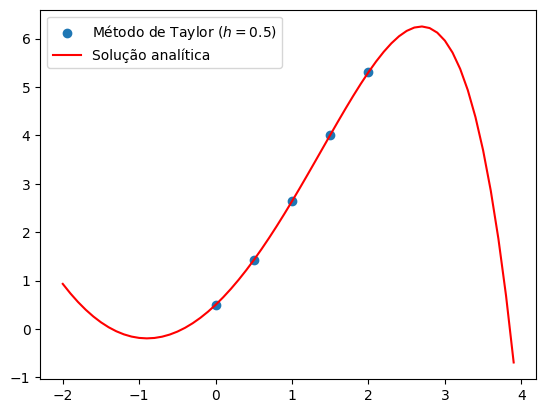

In [4]:
w, t = metodo_de_taylor_ordem_4(4, 0.5, 0, 2)

h = t[1] - t[0]

x = np.arange(-2,4,0.1)
y = g(x)

print(abs(g(t) - w))

plt.scatter(t,w, label=f'Método de Taylor ($h = {h}$)')
plt.plot(x,y, label='Solução analítica', c='r')
plt.legend()
plt.savefig('metodo_de_taylor_ordem_4.pdf')
plt.show()

1.0 & 0.0000 & 0.0000 & 0.0000 \\
1.1 & 0.3462 & 0.3459 & 0.0003 \\
1.2 & 0.8672 & 0.8666 & 0.0006 \\
1.3 & 1.6082 & 1.6072 & 0.0010 \\
1.4 & 2.6219 & 2.6204 & 0.0015 \\
1.5 & 3.9697 & 3.9677 & 0.0021 \\
1.6 & 5.7237 & 5.7210 & 0.0027 \\
1.7 & 7.9673 & 7.9639 & 0.0034 \\
1.8 & 10.7979 & 10.7936 & 0.0043 \\
1.9 & 14.3282 & 14.3231 & 0.0052 \\
2.0 & 18.6893 & 18.6831 & 0.0062 \\


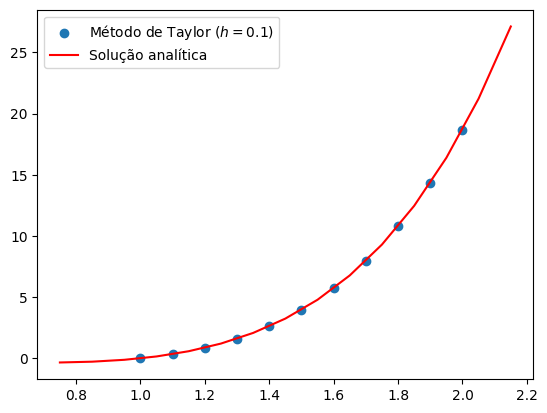

In [10]:
def f(t,y):
    return (2/t)*y + t**2 * np.exp(t)

def df(t,y):
    return -(2/(t**2)) * y + np.exp(t)*(2*t + t**2) + (2/t)*f(t,y)

def d2f(t,y):
    return (4/(t**3))*y - (4/(t**2))*f(t,y) + (2/t)*df(t,y) + np.exp(t)*((t**2) + 4*t + 2)

def d3f(t,y):
    return -(12/(t**4))*y + (16/(t**3))*f(t,y) - (2/(t**2))*df(t,y) + (2/t)*d2f(t,y) + np.exp(t)*(t**2 + 6*t + 6)

def g(t):
    return (np.exp(t) - np.exp(1))*(t**2)

w,t = metodo_de_taylor_ordem_4(10, 0, 1, 2)
h = t[1] - t[0]

x = np.arange(0.75,2.25,0.1)
y = g(x)

for i in range(len(t)):
    e = abs(g(t) - w)
    print(f"{t[i]:.1f} & {w[i]:.4f} & {g(t)[i]:.4f} & {e[i]:.4f} \\\\")

plt.scatter(t,w, label=f'Método de Taylor ($h = {h:.1f}$)')
plt.plot(x,y, label='Solução analítica', c='r')
plt.legend()
plt.savefig('q9c.pdf')
plt.show()


In [23]:
def neville(A,x):
    X = A[:,0]
    Y = A[:,1]
    
    n = len(A)
    
    B = np.zeros((n,n))
    
    B[:,0] = Y
    
    for i in range(1,n):
        for j in range(1, i + 1):
            B[i,j] = (((x - X[i-j])*B[i,j-1]) - ((x - X[i])*B[i-1,j-1]))/(X[i]-X[i-j])
    
    # for i in range(n):
    #     for j in range(n):
    #         print(f'{B[i,j]:.3f}', end='\t')
    #     print("")
        
    print(f"Solução aproximada para {x} ::: {B[n-1,n-1]}")
    
    
A = np.zeros((len(w),2))
A[:,0] = t
A[:,1] = w
    
# print(A)

neville(A[0:2, :],1.04)
neville(A[5:7, :],1.55)
neville(A[9:11,:],1.97)

print(f"Solução exata para 1.04 ::: {g(1.04)}")
print(f"Solução exata para 1.55 ::: {g(1.55)}")
print(f"Solução exata para 1.97 ::: {g(1.97)}")

Solução aproximada para 1.04 ::: 0.13591409142295227
Solução aproximada para 1.55 ::: 4.777032797589342
Solução aproximada para 1.97 ::: 17.17480076490251
Solução exata para 1.04 ::: 0.11998749706134393
Solução exata para 1.55 ::: 4.788635020801403
Solução exata para 1.97 ::: 17.279298435557664


erro ::: [0.         0.00635361 0.01475071 0.02543325 0.03865936 0.05470622
 0.07387303 0.09648414 0.12289254 0.1534835  0.18867871]


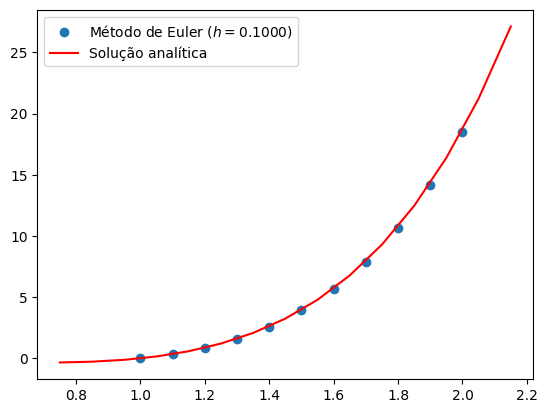

In [24]:
w,t = metodo_de_taylor_ordem_4(10, 0, 1, 2)
h = t[1] - t[0]

x = np.arange(0.75,2.25,0.1)
y = g(x)

print(f"erro ::: {abs(g(t) - w)}")

plt.scatter(t,w, label=f'Método de Euler ($h = {h:.4f}$)')
plt.plot(x,y, label='Solução analítica', c='r')
plt.legend()
# plt.savefig('metodo_de_taylor.pdf')
plt.show()

In [25]:
A = np.zeros((len(w),2))
A[:,0] = t
A[:,1] = w
    
# print(A)

neville(A[0:2, :],1.04)
neville(A[5:7, :],1.55)
neville(A[9:11,:],1.97)

print(f"Solução exata para 1.04 ::: {g(1.04)}")
print(f"Solução exata para 1.55 ::: {g(1.55)}")
print(f"Solução exata para 1.97 ::: {g(1.97)}")

Solução aproximada para 1.04 ::: 0.13582650734789697
Solução aproximada para 1.55 ::: 4.780024286311063
Solução aproximada para 1.97 ::: 17.19697227032516
Solução exata para 1.04 ::: 0.11998749706134393
Solução exata para 1.55 ::: 4.788635020801403
Solução exata para 1.97 ::: 17.279298435557664


[[ 0.          8.        ]
 [ 0.1         6.88768926]
 [ 0.2         5.80808144]
 [ 0.3         4.7557506 ]
 [ 0.4         3.72579903]
 [ 0.5         2.71375012]
 [ 0.6         1.71545875]
 [ 0.7         0.72703489]
 [ 0.8        -0.25522288]
 [ 0.9        -1.23555915]
 [ 1.         -2.21497881]]
0.7738890810041733


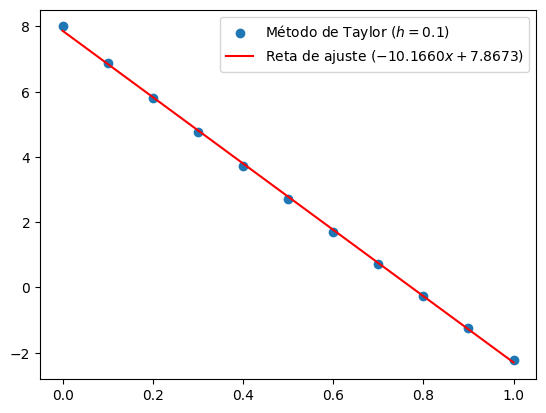

In [11]:
def minimos_quadrados_polinomial(D, g):
    X = D[:,0]
    Y = D[:,1]
    
    h = g+1
    
    A = np.zeros((h,h))
    b = np.zeros(h)
    
    for i in range(h):
        for j in range(h):
            A[i,j] = np.sum((X)**(i+j))
            
    for i in range(h):
        b[i] = np.sum(((X)**i)*Y)
        
    d = np.linalg.solve(A,b)
    c = np.zeros(len(d))
    
    for i in range(len(d)):
        c[i] = d[len(d)-i-1]
    
    return c

def f(t,x):
    g = 9.8
    m = 0.11
    k = 0.002
    
    return -g - (k/m) * x * abs(x)

def df(t,x):
    g = 9.8
    m = 0.11
    k = 0.002
    
    if x == 0:
        return 0
    else:
        return (2*(k/m)*(x**2)*f(t,x))/abs(x)

w, t = metodo_de_taylor_ordem_2(10, 8, 0, 1)

h = t[1] - t[0]

A = np.zeros((len(w),2))
A[:,0] = t
A[:,1] = w

print(A)

c = minimos_quadrados_polinomial(A,1)
x = np.linspace(np.min(A[:,0]), np.max(A[:,0]), 10)
y = np.polyval(c, x)

print(f"{-c[1]/c[0]}")

plt.scatter(t,w, label=f'Método de Taylor ($h = {h:.1f}$)')
plt.plot(x,y, c='r', label=f'Reta de ajuste (${c[0]:.4f}x + {c[1]:.4f}$)')
plt.legend()
plt.savefig('q12.pdf')
plt.show()


[[0.         0.        ]
 [0.1        0.1       ]
 [0.2        0.20025004]
 [0.3        0.30165255]
 [0.4        0.40572652]
 [0.5        0.51463889]
 [0.6        0.63124269]
 [0.7        0.75907977]
 [0.8        0.90223431]
 [0.9        1.06477676]
 [1.         1.24930488]
 [1.1        1.45397789]
 [1.2        1.66833944]
 [1.3        1.87142297]
 [1.4        2.03821373]
 [1.5        2.15259867]
 [1.6        2.21325918]
 [1.7        2.22830049]
 [1.8        2.20803844]
 [1.9        2.16140919]
 [2.         2.09518497]]


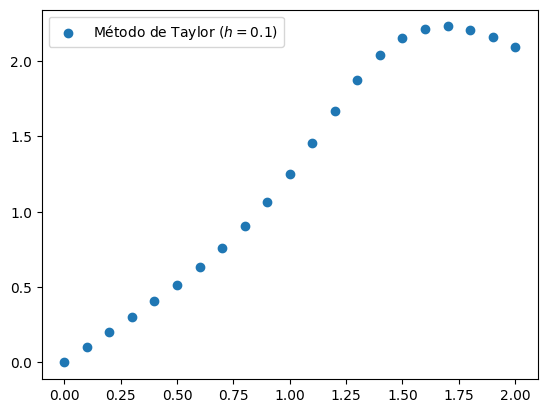

In [12]:
def f(t,x):
    return 1 + t*np.sin(t*x)

def df(t,x):
    return np.sin(t*x) + t*np.cos(t*x)*(x + t*f(t,x))

w, t = metodo_de_taylor_ordem_2(20, 0, 0, 2)

h = t[1] - t[0]

A = np.zeros((len(w),2))
A[:,0] = t
A[:,1] = w

print(A)

plt.scatter(t,w, label=f'Método de Taylor ($h = {h:.1f}$)')
plt.legend()
plt.savefig('q11.pdf')
plt.show()
